example notebook to demostrate image capture using the API. Can be ran from a windows laptop too.

In [9]:
from PIL import Image
from io import BytesIO
import numpy as np
import requests

#pi_address = 'raspberrypi.local'
pi_address = '10.61.100.177'

In [10]:
r = requests.get(f'http://{pi_address}:8000/controls')
print(r.content)
controls = r.json()
# get current controls and adjust amount to 10
controls['amount']=10
r = requests.put(f'http://{pi_address}:8000/controls', json = controls)
print(r.content)

b'{"amount":10,"analog_gain":1.0,"apply":false,"cam_close":false,"cam_open":true,"download":false,"download_option":"tiff","exposure_us":300,"illumination":true,"mode":0}\n'
b'{"amount":10,"analog_gain":1.0,"apply":false,"cam_close":false,"cam_open":true,"download":false,"download_option":"tiff","exposure_us":300,"illumination":true,"mode":0}\n'


capture an array of 10 images

In [11]:
import time
from numpy.lib.npyio import NpzFile 

r = requests.get(f'http://{pi_address}:8000/capturefast')
#print(r.content)

ret = NpzFile(BytesIO(r.content), own_fid=True, allow_pickle=True)  
print(ret.files)  
""" ['A'] """  
print(ret['A'].shape)  
""" (10,400,400) """  

['A']
(10, 400, 400)


' (10,400,400) '

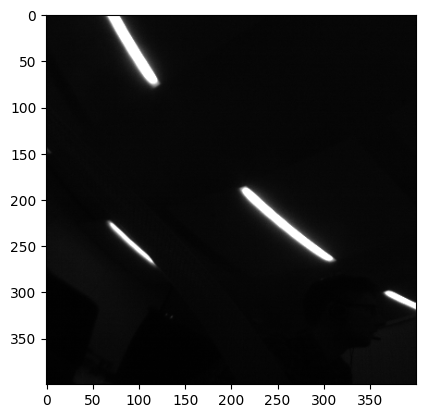

In [12]:
import matplotlib.pyplot as plt
plt.imshow(ret['A'][0],cmap='gray')
plt.show()